<center>
<img src="https://github.com/Yorko/mlcourse.ai/blob/master/img/ods_stickers.jpg?raw=1">
## Открытый курс по машинному обучению. Сессия № 2
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 10. Бустинг
## <center> Часть 10. Продвинутые методы работы с категориальными признаками и CatBoost

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

Считаем данные и посмотрим на первые несколько строк. Видим, что у нас тут немало категориальных признаков.

In [39]:
from urllib.request import urlopen
df = pd.read_csv(urlopen('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/bank.csv'))
df.shape

(4521, 17)

In [40]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null int64
dtypes: int64(8), object(9)
memory usage: 600.5+ KB


Всего 9 признаков со строковыми значениями.

In [42]:
df.columns[df.dtypes == 'object']

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

## Без категориальных признаков
Попытаемся сначала просто проигнорировать категориальные признаки. Обучим случайный лес и посмотрим на ROC AUC на кросс-валидации и на отоженной выборке. Это будет наш бейзлайн. 

In [0]:
df_no_cat, y = df.loc[:, df.dtypes != 'object'].drop('y', axis=1), df['y']

In [0]:
df_no_cat_part, df_no_cat_valid, y_train_part, y_valid = train_test_split(df_no_cat, y,
                                                                            test_size=.3, 
                                                                            stratify=y,
                                                                            random_state=17)

In [45]:
df_no_cat_part.shape

(3164, 7)

In [46]:
df_no_cat_part.head()

,age,balance,day,duration,campaign,pdays,previous
482,40,694,4,97,4,196,5
566,26,211,29,168,3,-1,0
2209,59,0,18,247,4,-1,0
725,31,1010,15,385,3,364,9
1025,56,1044,3,353,2,-1,0


In [0]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [0]:
forest = RandomForestClassifier(random_state=17)

In [49]:
np.mean(cross_val_score(forest, df_no_cat_part, y_train_part, cv=skf, scoring='roc_auc'))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

0.8062231882485147

In [50]:
forest.fit(df_no_cat_part, y_train_part)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=17, verbose=0,
                       warm_start=False)

In [51]:
roc_auc_score(y_valid, forest.predict_proba(df_no_cat_valid)[:, 1])

0.8246600055509299

## LabelEncoder для категориальных признаков
Сделаем то же самое, но попробуем закодировать категориальные признаки по-простому: с помощью `LabelEncoder`.

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
label_encoder = LabelEncoder()

In [0]:
df_cat_label_enc = df.copy().drop('y', axis=1)
for col in df.columns[df.dtypes == 'object']:
    df_cat_label_enc[col] = label_encoder.fit_transform(df_cat_label_enc[col])

In [55]:
df_cat_label_enc.shape

(4521, 16)

In [56]:
df_cat_label_enc.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3


In [0]:
df_cat_label_enc_part, df_cat_label_enc_valid = train_test_split(df_cat_label_enc, test_size=.3, 
                                                    stratify=y, random_state=17)

In [58]:
df_cat_label_enc_part.shape

(3164, 16)

In [59]:
np.mean(cross_val_score(forest, df_cat_label_enc_part, y_train_part, cv=skf, scoring='roc_auc'))

0.8413110145668286

In [60]:
forest.fit(df_cat_label_enc_part, y_train_part)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=17, verbose=0,
                       warm_start=False)

In [61]:
roc_auc_score(y_valid, forest.predict_proba(df_cat_label_enc_valid)[:, 1])

0.8481473771856786

## Бинаризация категориальных признаков (dummies, OHE)
Теперь сделаем то, что обычно по умолчанию и делают – бинаризацию категориальных признаков. Dummy-признаки, One-Hot Encoding... с небольшими различиями это об одном же - для каждого значения каждого категориального признака завести свой бинарный признак.

In [0]:
df_cat_dummies = pd.get_dummies(df, columns=df.columns[df.dtypes == 'object']).drop('y', axis=1)

In [63]:
df_cat_dummies.shape

(4521, 51)

In [64]:
df_cat_dummies.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [65]:
df_cat_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 51 columns):
age                    4521 non-null int64
balance                4521 non-null int64
day                    4521 non-null int64
duration               4521 non-null int64
campaign               4521 non-null int64
pdays                  4521 non-null int64
previous               4521 non-null int64
job_admin.             4521 non-null uint8
job_blue-collar        4521 non-null uint8
job_entrepreneur       4521 non-null uint8
job_housemaid          4521 non-null uint8
job_management         4521 non-null uint8
job_retired            4521 non-null uint8
job_self-employed      4521 non-null uint8
job_services           4521 non-null uint8
job_student            4521 non-null uint8
job_technician         4521 non-null uint8
job_unemployed         4521 non-null uint8
job_unknown            4521 non-null uint8
marital_divorced       4521 non-null uint8
marital_married        4521 non-n

In [0]:
df_cat_dummies_part, df_cat_dummies_valid = train_test_split(df_cat_dummies, test_size=.3, 
                                                    stratify=y, random_state=17)

In [67]:
np.mean(cross_val_score(forest, df_cat_dummies_part, y_train_part, cv=skf, scoring='roc_auc'))

0.84579530735273

In [68]:
forest.fit(df_cat_dummies_part, y_train_part)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=17, verbose=0,
                       warm_start=False)

In [69]:
roc_auc_score(y_valid, forest.predict_proba(df_cat_dummies_valid)[:, 1])

0.8587742052563034

## Попарные взаимодействия признаков
Пока лес все еще лучше регрессии (хотя мы не тюнили гиперпараметры, но и не будем). Мы хотим идти дальше. Мощной техникой для работы с категориальными признаками будет учет попарных взаимодействий признаков (feature interactions). Построим попарные взаимодействия всех признаков. Вообще тут можно пойти дальше и строить взаимодействия трех и более признаков. Owen Zhang [как-то строил](https://www.youtube.com/watch?v=LgLcfZjNF44) даже 7-way interactions. Чего не сделаешь ради победы на Kaggle! :)

In [0]:
df_interact = df.copy()

In [0]:
cat_features = df.columns[df.dtypes == 'object']
for i, col1 in enumerate(cat_features):
    for j, col2 in enumerate(cat_features[i + 1:]):
        df_interact[col1 + '_' + col2] = df_interact[col1] + '_' + df_interact[col2] 

In [72]:
df_interact.shape

(4521, 53)

In [73]:
df_interact.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_marital,job_education,job_default,job_housing,job_loan,job_contact,job_month,job_poutcome,marital_education,marital_default,marital_housing,marital_loan,marital_contact,marital_month,marital_poutcome,education_default,education_housing,education_loan,education_contact,education_month,education_poutcome,default_housing,default_loan,default_contact,default_month,default_poutcome,housing_loan,housing_contact,housing_month,housing_poutcome,loan_contact,loan_month,loan_poutcome,contact_month,contact_poutcome,month_poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0,unemployed_married,unemployed_primary,unemployed_no,unemployed_no,unemployed_no,unemployed_cellular,unemployed_oct,unemployed_unknown,married_primary,married_no,married_no,married_no,married_cellular,married_oct,married_unknown,primary_no,primary_no,primary_no,primary_cellular,primary_oct,primary_unknown,no_no,no_no,no_cellular,no_oct,no_unknown,no_no,no_cellular,no_oct,no_unknown,no_cellular,no_oct,no_unknown,cellular_oct,cellular_unknown,oct_unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0,services_married,services_secondary,services_no,services_yes,services_yes,services_cellular,services_may,services_failure,married_secondary,married_no,married_yes,married_yes,married_cellular,married_may,married_failure,secondary_no,secondary_yes,secondary_yes,secondary_cellular,secondary_may,secondary_failure,no_yes,no_yes,no_cellular,no_may,no_failure,yes_yes,yes_cellular,yes_may,yes_failure,yes_cellular,yes_may,yes_failure,cellular_may,cellular_failure,may_failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0,management_single,management_tertiary,management_no,management_yes,management_no,management_cellular,management_apr,management_failure,single_tertiary,single_no,single_yes,single_no,single_cellular,single_apr,single_failure,tertiary_no,tertiary_yes,tertiary_no,tertiary_cellular,tertiary_apr,tertiary_failure,no_yes,no_no,no_cellular,no_apr,no_failure,yes_no,yes_cellular,yes_apr,yes_failure,no_cellular,no_apr,no_failure,cellular_apr,cellular_failure,apr_failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0,management_married,management_tertiary,management_no,management_yes,management_yes,management_unknown,management_jun,management_unknown,married_tertiary,married_no,married_yes,married_yes,married_unknown,married_jun,married_unknown,tertiary_no,tertiary_yes,tertiary_yes,tertiary_unknown,tertiary_jun,tertiary_unknown,no_yes,no_yes,no_unknown,no_jun,no_unknown,yes_yes,yes_unknown,yes_jun,yes_unknown,yes_unknown,yes_jun,yes_unknown,unknown_jun,unknown_unknown,jun_unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0,blue-collar_married,blue-collar_secondary,blue-collar_no,blue-collar_yes,blue-collar_no,blue-collar_unknown,blue-collar_may,blue-collar_unknown,married_secondary,married_no,married_yes,married_no,married_unknown,married_may,married_unknown,secondary_no,secondary_yes,secondary_no,secondary_unknown,secondary_may,secondary_unknown,no_yes,no_no,no_unknown,no_may,no_unknown,yes_no,yes_unknown,yes_may,yes_unknown,no_unknown,no_may,no_unknown,unknown_may,unknown_unknown,may_unknown


## Бинаризация категориальных признаков (dummies, OHE) + попарные взаимодействия
Получилось аж 824 бинарных признака – многовато для такой задачи, и тут случайный лес начинает не справляться, да и логистическая регрессия сработала хуже, чем в прошлый раз.

In [0]:
df_interact_cat_dummies = pd.get_dummies(df_interact, columns=df_interact.columns[df_interact.dtypes == 'object']).drop('y', axis=1)

In [75]:
df_interact_cat_dummies.shape

(4521, 824)

In [76]:
df_interact_cat_dummies.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,...,month_poutcome_dec_failure,month_poutcome_dec_other,month_poutcome_dec_success,month_poutcome_dec_unknown,month_poutcome_feb_failure,month_poutcome_feb_other,month_poutcome_feb_success,month_poutcome_feb_unknown,month_poutcome_jan_failure,month_poutcome_jan_other,month_poutcome_jan_success,month_poutcome_jan_unknown,month_poutcome_jul_failure,month_poutcome_jul_other,month_poutcome_jul_success,month_poutcome_jul_unknown,month_poutcome_jun_failure,month_poutcome_jun_other,month_poutcome_jun_success,month_poutcome_jun_unknown,month_poutcome_mar_failure,month_poutcome_mar_other,month_poutcome_mar_success,month_poutcome_mar_unknown,month_poutcome_may_failure,month_poutcome_may_other,month_poutcome_may_success,month_poutcome_may_unknown,month_poutcome_nov_failure,month_poutcome_nov_other,month_poutcome_nov_success,month_poutcome_nov_unknown,month_poutcome_oct_failure,month_poutcome_oct_other,month_poutcome_oct_success,month_poutcome_oct_unknown,month_poutcome_sep_failure,month_poutcome_sep_other,month_poutcome_sep_success,month_poutcome_sep_unknown
0,30,1787,19,79,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,33,4789,11,220,1,339,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,59,0,5,226,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
df_interact_cat_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Columns: 824 entries, age to month_poutcome_sep_unknown
dtypes: int64(7), uint8(817)
memory usage: 3.8 MB


In [0]:
df_interact_cat_dummies_part, df_interact_cat_dummies_valid = train_test_split(df_interact_cat_dummies, test_size=.3, 
                                                    stratify=y, random_state=17)

In [79]:
np.mean(cross_val_score(forest, df_interact_cat_dummies_part, y_train_part, cv=skf, scoring='roc_auc'))

0.7919934473777258

In [80]:
forest.fit(df_interact_cat_dummies_part, y_train_part)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=17, verbose=0,
                       warm_start=False)

In [81]:
roc_auc_score(y_valid, forest.predict_proba(df_interact_cat_dummies_valid)[:, 1])

0.7673039561049553

Случайному лесу уже тяжеловато, когда признаков так много, а вот логистической регрессии – норм.

In [0]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=17)

In [83]:
np.mean(cross_val_score(logit, df_interact_cat_dummies_part, y_train_part, cv=skf, scoring='roc_auc'))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

0.872452292848916

In [84]:
logit.fit(df_interact_cat_dummies_part, y_train_part)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=17, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
roc_auc_score(y_valid, logit.predict_proba(df_interact_cat_dummies_valid)[:, 1])

0.8815089989111637

## Mean Target
Теперь будем использовать технику кодирования категориальных признаков средним значением целевого признака. Это очень мощная техника, правда, надо умело ее использовать – легко переобучиться. 
Основная идея – для каждого значения категориального признака посчитать среднее значение целевого признака и заменить категориальный признак на посчитанные средние. Правда, считать средние надо на кросс-валидации, а то легко переобучиться. 
Но далее я адресую к видео топ-участников соревнований Kaggle, от них можно узнать про эту технику из первых уст. 
- [Специализация](https://www.coursera.org/specializations/aml) "Advanced Machine Learning" на Coursera, [курс](https://www.coursera.org/learn/competitive-data-science)", How to Win a Data Science Competition: Learn from Top Kagglers", несколько видео посвящено различным способам построяния признаков с задействованием целевого, и как при этом не переобучиться. Рассказывает Дмитрий Алтухов
- [Лекция](https://www.youtube.com/watch?v=g335THJxkto) с презентацией решения конкурса Kaggle BNP paribas, Станислав Семенов

Похожая техника [используется](https://tech.yandex.com/catboost/doc/dg/concepts/algorithm-main-stages_cat-to-numberic-docpage/) и в CatBoost.

Для начала давайте таким образом закодируем исходные категориальные признаки.

In [0]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [0]:
train_df, y = df.copy(), df['y']
train_df_part, valid_df, y_train_part, y_valid = train_test_split(train_df.drop('y', axis=1), y, 
                                                                  test_size=.3, stratify=y, 
                                                                               random_state=17)

In [0]:
def mean_target_enc(train_df, y_train, valid_df, skf):
    import warnings
    warnings.filterwarnings('ignore')
    
    glob_mean = y_train.mean()
    train_df = pd.concat([train_df, pd.Series(y_train, name='y')], axis=1)
    new_train_df = train_df.copy()
    
    cat_features = train_df.columns[train_df.dtypes == 'object'].tolist()    

    for col in cat_features:
        new_train_df[col + '_mean_target'] = [glob_mean for _ in range(new_train_df.shape[0])]

    for train_idx, valid_idx in skf.split(train_df, y_train):
        train_df_cv, valid_df_cv = train_df.iloc[train_idx, :], train_df.iloc[valid_idx, :]

        for col in cat_features:
            
            means = valid_df_cv[col].map(train_df_cv.groupby(col)['y'].mean())
            valid_df_cv[col + '_mean_target'] = means.fillna(glob_mean)
            
        new_train_df.iloc[valid_idx] = valid_df_cv
    
    new_train_df.drop(cat_features + ['y'], axis=1, inplace=True)
    
    for col in cat_features:
        means = valid_df[col].map(train_df.groupby(col)['y'].mean())
        valid_df[col + '_mean_target'] = means.fillna(glob_mean)
        
    valid_df.drop(train_df.columns[train_df.dtypes == 'object'], axis=1, inplace=True)
    
    return new_train_df, valid_df

In [0]:
train_mean_target_part, valid_mean_target = mean_target_enc(train_df_part, y_train_part, valid_df, skf)

In [95]:
train_df_part.shape

(3164, 16)

In [94]:
train_mean_target_part.shape, valid_mean_target.shape

((3164, 16), (1357, 16))

In [99]:
train_df_part.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
482,40,technician,married,secondary,no,694,yes,no,cellular,4,feb,97,4,196,5,failure
566,26,self-employed,single,tertiary,no,211,no,no,cellular,29,jan,168,3,-1,0,unknown
2209,59,retired,married,secondary,no,0,no,no,cellular,18,jul,247,4,-1,0,unknown
725,31,management,married,tertiary,no,1010,yes,no,cellular,15,may,385,3,364,9,other
1025,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown


In [97]:
train_mean_target_part.head()

,age,balance,day,duration,campaign,pdays,previous,job_mean_target,marital_mean_target,education_mean_target,default_mean_target,housing_mean_target,loan_mean_target,contact_mean_target,month_mean_target,poutcome_mean_target
482,40,694,4,97,4,196,5,0.112128,0.101030,0.111541,0.115849,0.092254,0.122611,0.139435,0.163934,0.120301
566,26,211,29,168,3,-1,0,0.106383,0.128167,0.142292,0.115570,0.143369,0.124474,0.142503,0.123457,0.089806
2209,59,0,18,247,4,-1,0,0.214286,0.100381,0.103987,0.115169,0.144567,0.122782,0.140405,0.094763,0.091522
725,31,1010,15,385,3,364,9,0.132979,0.104180,0.142292,0.115570,0.093286,0.124474,0.142503,0.074264,0.209091
1025,56,1044,3,353,2,-1,0,0.222222,0.104180,0.103825,0.115570,0.143369,0.124474,0.139665,0.085642,0.089806


In [101]:
y_train_part.shape

(3164,)

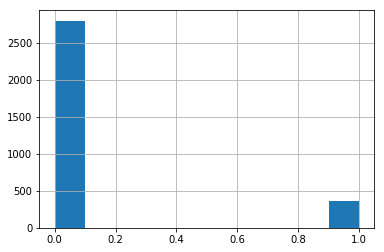

In [102]:
y_train_part.hist()

In [90]:
np.mean(cross_val_score(forest, train_mean_target_part, y_train_part, cv=skf, scoring='roc_auc'))

0.8439875686594386

In [91]:
forest.fit(train_mean_target_part, y_train_part)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=17, verbose=0,
                       warm_start=False)

In [92]:
roc_auc_score(y_valid, forest.predict_proba(valid_mean_target)[:, 1])

0.8670712440487627

## Mean Target + попарные взаимодействия

In [0]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [0]:
train_df, y = df_interact.drop('y', axis=1).copy(), df_interact['y']
train_df_part, valid_df, y_train_part, y_valid = train_test_split(train_df, y, 
                                                                  test_size=.3, stratify=y, 
                                                                               random_state=17)

In [0]:
train_mean_target_part, valid_mean_target = mean_target_enc(train_df_part, y_train_part, valid_df, skf)

In [105]:
train_mean_target_part.shape

(3164, 52)

In [106]:
train_mean_target_part.head()

,age,balance,day,duration,campaign,pdays,previous,job_mean_target,marital_mean_target,education_mean_target,default_mean_target,housing_mean_target,loan_mean_target,contact_mean_target,month_mean_target,poutcome_mean_target,job_marital_mean_target,job_education_mean_target,job_default_mean_target,job_housing_mean_target,job_loan_mean_target,job_contact_mean_target,job_month_mean_target,job_poutcome_mean_target,marital_education_mean_target,marital_default_mean_target,marital_housing_mean_target,marital_loan_mean_target,marital_contact_mean_target,marital_month_mean_target,marital_poutcome_mean_target,education_default_mean_target,education_housing_mean_target,education_loan_mean_target,education_contact_mean_target,education_month_mean_target,education_poutcome_mean_target,default_housing_mean_target,default_loan_mean_target,default_contact_mean_target,default_month_mean_target,default_poutcome_mean_target,housing_loan_mean_target,housing_contact_mean_target,housing_month_mean_target,housing_poutcome_mean_target,loan_contact_mean_target,loan_month_mean_target,loan_poutcome_mean_target,contact_month_mean_target,contact_poutcome_mean_target,month_poutcome_mean_target
482,40,694,4,97,4,196,5,0.112128,0.101030,0.111541,0.115849,0.092254,0.122611,0.139435,0.163934,0.120301,0.090909,0.112245,0.112150,0.090535,0.124668,0.136364,0.380952,0.195122,0.097990,0.101629,0.083053,0.107527,0.124080,0.098361,0.109677,0.112431,0.086076,0.119545,0.134545,0.152542,0.129496,0.092539,0.122517,0.140088,0.168067,0.120755,0.095079,0.117073,0.063830,0.085227,0.149854,0.186916,0.126638,0.169811,0.119342,0.103448
566,26,211,29,168,3,-1,0,0.106383,0.128167,0.142292,0.115570,0.143369,0.124474,0.142503,0.123457,0.089806,0.173913,0.181818,0.108696,0.134615,0.121951,0.118644,0.000000,0.109756,0.156250,0.127080,0.153846,0.134126,0.151579,0.062500,0.104478,0.143808,0.158291,0.150602,0.163121,0.130435,0.110754,0.144545,0.124053,0.142588,0.123457,0.089921,0.158061,0.159367,0.187500,0.103301,0.155147,0.142857,0.097037,0.128571,0.112688,0.083333
2209,59,0,18,247,4,-1,0,0.214286,0.100381,0.103987,0.115169,0.144567,0.122782,0.140405,0.094763,0.091522,0.183673,0.160000,0.216000,0.237113,0.235849,0.164557,0.074074,0.166667,0.088418,0.100965,0.125382,0.105784,0.126556,0.078740,0.076507,0.103503,0.133891,0.112825,0.129032,0.096491,0.078598,0.144725,0.122101,0.140635,0.094629,0.091176,0.158405,0.161168,0.086538,0.106566,0.150875,0.106762,0.098163,0.093939,0.113300,0.080311
725,31,1010,15,385,3,364,9,0.132979,0.104180,0.142292,0.115570,0.093286,0.124474,0.142503,0.074264,0.209091,0.139394,0.139130,0.134650,0.129496,0.141988,0.163462,0.072581,0.280000,0.136476,0.104681,0.085421,0.112394,0.131718,0.053879,0.184615,0.143808,0.124654,0.150602,0.163121,0.101190,0.322581,0.092672,0.124053,0.142588,0.074219,0.205607,0.097643,0.125000,0.071742,0.180556,0.155147,0.074405,0.210526,0.105802,0.221053,0.102564
1025,56,1044,3,353,2,-1,0,0.222222,0.104180,0.103825,0.115570,0.143369,0.124474,0.139665,0.085642,0.089806,0.193548,0.134615,0.224138,0.260417,0.244898,0.454545,0.086957,0.170732,0.091837,0.104681,0.128508,0.112394,0.155738,0.072874,0.074426,0.103339,0.135081,0.113571,0.128205,0.082126,0.075949,0.144545,0.124053,0.140449,0.085714,0.089921,0.158061,0.188119,0.071090,0.103301,0.151899,0.106227,0.097037,0.100000,0.099237,0.073879


In [107]:
np.mean(cross_val_score(forest, train_mean_target_part, y_train_part, cv=skf, scoring='roc_auc'))

0.8350562884869193

In [108]:
forest.fit(train_mean_target_part, y_train_part)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=17, verbose=0,
                       warm_start=False)

In [109]:
roc_auc_score(y_valid, forest.predict_proba(valid_mean_target)[:, 1])

0.8690167381882619

Опять лучше справляется логистическая регрессия.

In [110]:
np.mean(cross_val_score(logit, train_mean_target_part, y_train_part, cv=skf, scoring='roc_auc'))

0.8930349309817294

In [111]:
logit.fit(train_mean_target_part, y_train_part)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=17, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
roc_auc_score(y_valid, logit.predict_proba(valid_mean_target)[:, 1])

0.9032750485706357

## Catboost
В библиотеке [Catboost](https://catboost.yandex), помимо всего прочего, реализована как раз техника кодирования категориальных значений средним значением целевого признака. Результаты получаются хорошими именно когда в данных много важных категориальных признаков. Из минусов можно отметить меньшую (пока что) производительность в сравнении с Xgboost и LightGBM.

In [122]:
!pip install catboost

  Using cached https://files.pythonhosted.org/packages/39/51/bfab1d94e2bed6302e3e58738b1135994888b09f29c7cee8686d431b9281/catboost-0.17.3-cp36-none-manylinux1_x86_64.whl


In [0]:
from catboost import CatBoostClassifier

In [0]:
ctb = CatBoostClassifier(random_seed=17)

In [0]:
train_df, y = df.drop('y', axis=1), df['y']
train_df_part, valid_df, y_train_part, y_valid = train_test_split(train_df, y, 
                                                                  test_size=.3, stratify=y, 
                                                                  random_state=17)

In [126]:
train_df_part.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
482,40,technician,married,secondary,no,694,yes,no,cellular,4,feb,97,4,196,5,failure
566,26,self-employed,single,tertiary,no,211,no,no,cellular,29,jan,168,3,-1,0,unknown
2209,59,retired,married,secondary,no,0,no,no,cellular,18,jul,247,4,-1,0,unknown
725,31,management,married,tertiary,no,1010,yes,no,cellular,15,may,385,3,364,9,other
1025,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown


In [0]:
cat_features_idx = np.where(train_df_part.dtypes == 'object')[0].tolist()

In [128]:
cat_features_idx

[1, 2, 3, 4, 6, 7, 8, 10, 15]

In [131]:
%%time
cv_scores = []
for train_idx, test_idx in skf.split(train_df_part, y_train_part):
    cv_train_df, cv_valid_df = train_df_part.iloc[train_idx, :], train_df_part.iloc[test_idx, :]
    y_cv_train, y_cv_valid = y_train_part.iloc[train_idx], y_train_part.iloc[test_idx]
    
    ctb.fit(cv_train_df, y_cv_train,
        cat_features=cat_features_idx);
    
    cv_scores.append(roc_auc_score(y_cv_valid, ctb.predict_proba(cv_valid_df)[:, 1]))

Learning rate set to 0.02179
0:	learn: 0.6697101	total: 36.9ms	remaining: 36.9s
1:	learn: 0.6475756	total: 62.1ms	remaining: 31s
2:	learn: 0.6327331	total: 77.6ms	remaining: 25.8s
3:	learn: 0.6125712	total: 111ms	remaining: 27.5s
4:	learn: 0.5972384	total: 136ms	remaining: 27.1s
5:	learn: 0.5793834	total: 168ms	remaining: 27.9s
6:	learn: 0.5624773	total: 188ms	remaining: 26.7s
7:	learn: 0.5503571	total: 211ms	remaining: 26.1s
8:	learn: 0.5358257	total: 239ms	remaining: 26.3s
9:	learn: 0.5218813	total: 264ms	remaining: 26.2s
10:	learn: 0.5101420	total: 278ms	remaining: 25s
11:	learn: 0.5005421	total: 294ms	remaining: 24.2s
12:	learn: 0.4886046	total: 331ms	remaining: 25.2s
13:	learn: 0.4795142	total: 383ms	remaining: 26.9s
14:	learn: 0.4687296	total: 419ms	remaining: 27.5s
15:	learn: 0.4619291	total: 432ms	remaining: 26.5s
16:	learn: 0.4516819	total: 456ms	remaining: 26.4s
17:	learn: 0.4394740	total: 492ms	remaining: 26.8s
18:	learn: 0.4312505	total: 516ms	remaining: 26.7s
19:	learn: 0.

In [132]:
np.mean(cv_scores)

0.8987922852871881

In [133]:
cv_scores

[0.9066046966731898,
 0.8759050880626222,
 0.9120107632093933,
 0.8796722113502935,
 0.9197686671404416]

In [134]:
%%time
ctb.fit(train_df_part, y_train_part,
        cat_features=cat_features_idx);

Learning rate set to 0.023211
0:	learn: 0.6667391	total: 37.9ms	remaining: 37.8s
1:	learn: 0.6423247	total: 78.7ms	remaining: 39.3s
2:	learn: 0.6182561	total: 121ms	remaining: 40.3s
3:	learn: 0.5997096	total: 152ms	remaining: 37.8s
4:	learn: 0.5804962	total: 192ms	remaining: 38.3s
5:	learn: 0.5632466	total: 236ms	remaining: 39s
6:	learn: 0.5466916	total: 276ms	remaining: 39.1s
7:	learn: 0.5297737	total: 299ms	remaining: 37.1s
8:	learn: 0.5180976	total: 321ms	remaining: 35.4s
9:	learn: 0.5083363	total: 336ms	remaining: 33.3s
10:	learn: 0.4925380	total: 376ms	remaining: 33.8s
11:	learn: 0.4797905	total: 399ms	remaining: 32.9s
12:	learn: 0.4681920	total: 447ms	remaining: 33.9s
13:	learn: 0.4561525	total: 489ms	remaining: 34.4s
14:	learn: 0.4442948	total: 531ms	remaining: 34.9s
15:	learn: 0.4336191	total: 569ms	remaining: 35s
16:	learn: 0.4229213	total: 612ms	remaining: 35.4s
17:	learn: 0.4129478	total: 662ms	remaining: 36.1s
18:	learn: 0.4037622	total: 701ms	remaining: 36.2s
19:	learn: 0.

In [135]:
roc_auc_score(y_valid, ctb.predict_proba(valid_df)[:, 1])

0.9163891201776297

In [137]:
roc_auc_score(y_valid, ctb.predict(valid_df))

0.672575204423664

In [140]:
p = ctb.predict_proba(valid_df)
p.shape

(1357, 2)

In [0]:
from matplotlib import pyplot as plt

(array([997., 128.,  60.,  34.,  38.,  34.,  28.,  15.,  14.,   9.]),
 array([1.68508813e-04, 9.55578903e-02, 1.90947272e-01, 2.86336653e-01,
        3.81726035e-01, 4.77115416e-01, 5.72504798e-01, 6.67894179e-01,
        7.63283561e-01, 8.58672942e-01, 9.54062324e-01]),
 <a list of 10 Patch objects>)

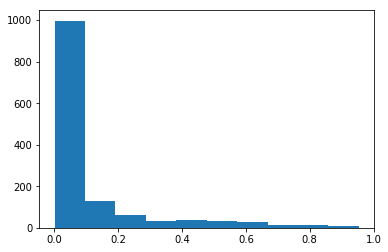

In [149]:
plt.hist(p[:,1])

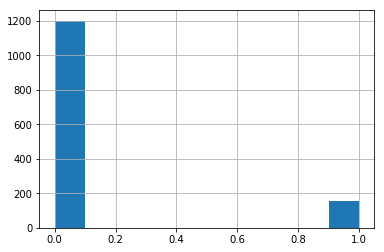

In [142]:
y_valid.hist()